In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
start = "2010-01-01"
end = "2022-12-31"

In [ ]:
df = yf.download("AAPL", start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [ ]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-12-23,130.487808,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,128.676834,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,124.728371,126.040001,131.029999,125.870003,129.669998,85438400
2022-12-29,128.261230,129.610001,130.479996,127.730003,127.989998,75703700
2022-12-30,128.577866,129.929993,129.949997,127.430000,128.410004,77034200


In [ ]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [ ]:
df = df.drop(["Date", "Adj Close"], axis = 1)
df.head()

<ipython-input-7-0ce72c8bd0b2>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(["Date", "Adj Close"], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


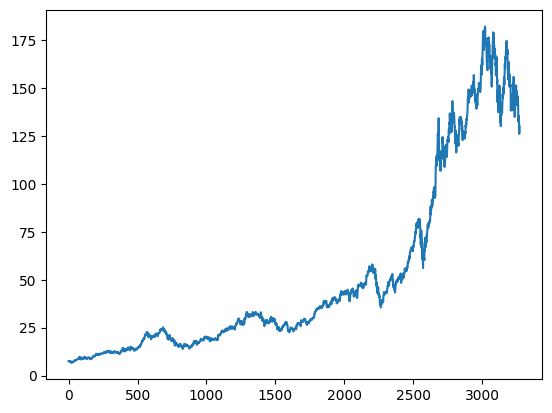

In [ ]:
plt.plot(df.Close)

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...
3267,131.860001,132.419998,129.639999,130.919998,63814900
3268,130.029999,131.410004,128.720001,131.380005,69007800
3269,126.040001,131.029999,125.870003,129.669998,85438400


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3267,150.515600
3268,150.157800
3269,149.764699
3270,149.412100


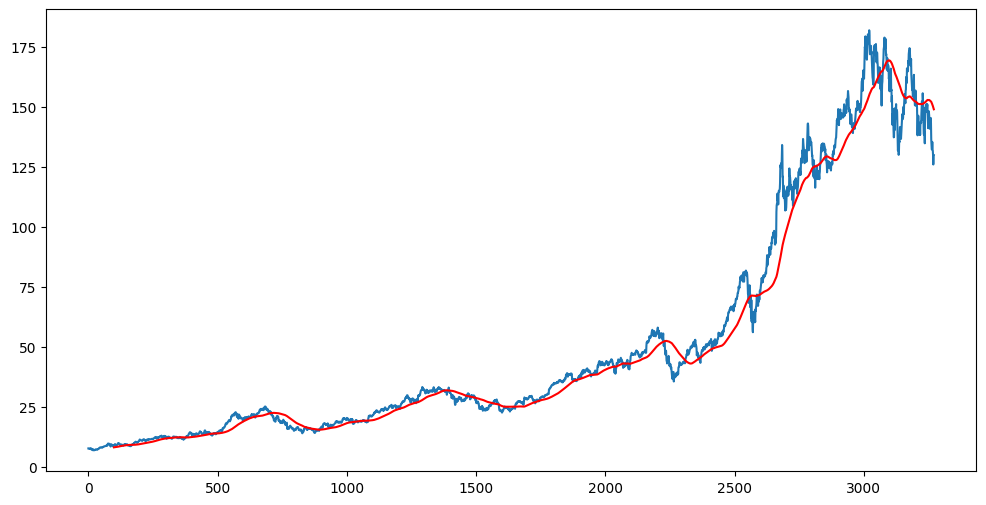

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, "r")

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3267,152.1331
3268,152.0096
3269,151.8867
3270,151.7593


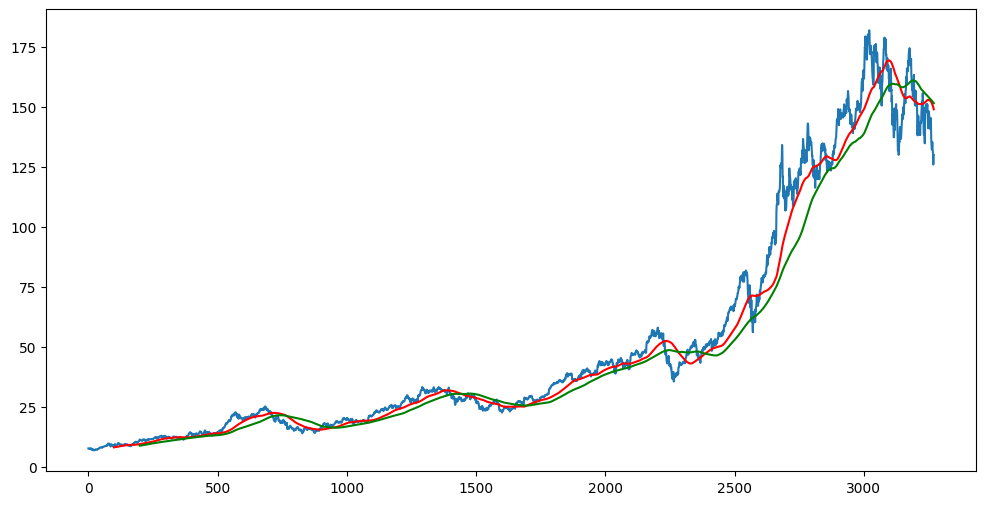

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, "r")
plt.plot(ma200, "g")

In [ ]:
df.shape

(3272, 5)

In [ ]:
#spliting data into training and testing
data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70): int(len(df))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [ ]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

Ticker,AAPL
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [ ]:
data_training_array.shape

(2290, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML model


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - loss: 0.0658
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - loss: 0.0086
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - loss: 0.0060
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - loss: 0.0053
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - loss: 0.0051
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - loss: 0.0046
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - loss: 0.0047
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - loss: 0.0044
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - loss: 0.0040
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - loss: 0.0037
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - loss: 0.0041
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - loss: 0.0035
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 39s 284ms/step - loss: 0.0034
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - loss: 0.0032
Epoch 15/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [ ]:
model.save("keras_model.h5")

In [ ]:
data_training.tail(100)

Ticker,AAPL
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [ ]:
past_100_days = data_training.tail(100)


In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Ticker,AAPL
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ... (your code to create final_df)

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(1082, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [ ]:
# Making Prediction

y_predicted = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [ ]:
y_predicted.shape

(982, 1)

In [ ]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [ ]:
y_predicted

array([[0.1309152 ],
       [0.1316742 ],
       [0.13247259],
       [0.13327478],
       [0.13405567],
       [0.1347968 ],
       [0.13548723],
       [0.1361215 ],
       [0.13670301],
       [0.13723534],
       [0.13772608],
       [0.1381911 ],
       [0.13864368],
       [0.13909282],
       [0.13953656],
       [0.13997304],
       [0.14040715],
       [0.14084022],
       [0.14126562],
       [0.14166692],
       [0.14202957],
       [0.14237145],
       [0.14272928],
       [0.14313234],
       [0.14360446],
       [0.14416786],
       [0.14484006],
       [0.145615  ],
       [0.14647666],
       [0.14744323],
       [0.14850128],
       [0.14960694],
       [0.15070727],
       [0.15175813],
       [0.15273228],
       [0.15362146],
       [0.1544345 ],
       [0.15519953],
       [0.15594998],
       [0.15670964],
       [0.15749618],
       [0.15833604],
       [0.15923758],
       [0.16019484],
       [0.16118616],
       [0.1621825 ],
       [0.16315868],
       [0.164

In [ ]:
scaler.scale_

array([0.00682769])

In [ ]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

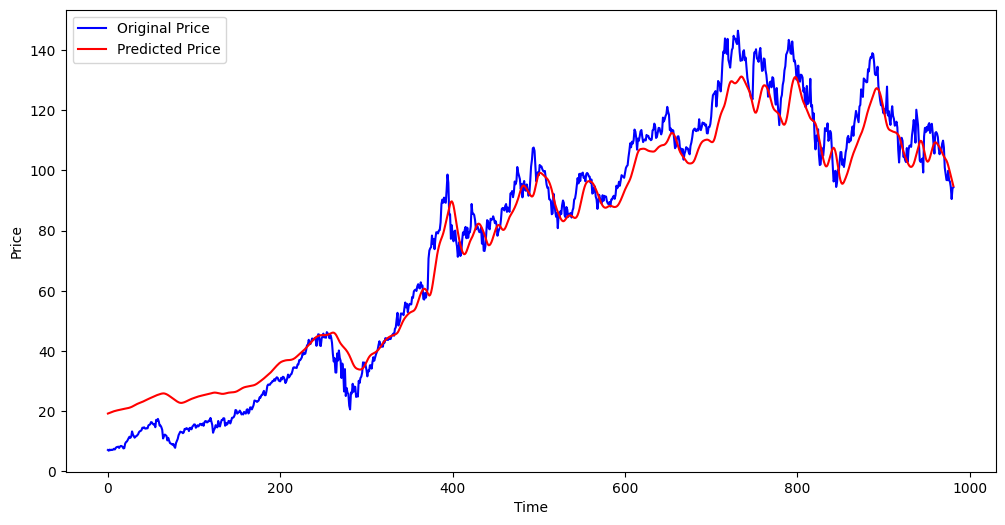

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, "b", label = "Original Price")
plt.plot(y_predicted, "r", label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()
plt.show()